# <center>Задача Коши</center>
### Задание: <br />

   <big> решить методом Тейлора 4-го порядка задачу Коши
   <br /> 
   <br /> 
   <center> $9y''+18y'+27y=exp(-3x), \ y(0)=1, y'(0)=0, \ x\in [0,2]$</center> 
   <br /> 
   с заданной относительной точностью 0.01. 
   <br>Найденное решение сравнить с решением по методу Рунге-Кутты кратности 4-5 (использовать стандартную программу из библиотек), а также точным решением. Результаты решения представить в виде фазовых траекторий.
</big>


<big>Перейдем к системе:
<center>$\begin{cases}{y''(x)=\frac{(exp(-3x)-18y'(x)-27y(x))}{9}  \\}{y(x)=y_1(x) \\}{y'(x)=y_2(x) \\}{y''(x)=y'_2(x)}\end{cases}$ </center>
    
    <br />
    <br />Получим: 
    <center>$y'_2(x)=\frac{(exp(-3x)-18y_2(x)-27y_1(x))}{9}$</center>
</big>

<big>**Метод разложения в ряд Тейлора**
    <br>
    Простейшим способом построения приближенного решения в точке $x_{n+1}$ сетки $\omega_N$ является способ, основанный на разложении решения в ряд Тейлора в предыдущей точке сетки $x_n$ по степеням шага $h$:
<br />
    <center> $y(x_{n+1})=y(x_n)+h\bigtriangleup(x_n,y_n,h)$,   (2)</center> 
    <br>
    <center>$\bigtriangleup(x_n,y_n,h)\equiv y'(x)+\frac{h}{2!}y''(x)+\frac{h^2}{3!}y'''(x)+...$</center>
    <br />
    Взяв вместо этого ряда конечный его отрезок
    <br />
    <center>$\varphi_p(x,y,h)\equiv y'(x)+\frac{h}{2!}y''(x)+...+\frac{h^{p-1}}{p!}y^{(p)}(x)$</center>
    <br />
    И заменяя в нём производные $y^{(k)}(x)$ в силу дифференциального уравнения.
    <br />
    <br />
    <center>$y'(x)=f(x,y(x)),$</center>
    <center>$y''(x)=\frac{d}{dx}f(x,y(x))=f'_x+f'_yf,$</center>
    <center>$y'''(x)=\frac{d}{dx}(f'_x+f'_yf)=f''_{xx}+f'_xf'_y+((f'_y)^2+2f''_{xy})f+f''_{yy}f^2,...,$</center>
    <br />
    получаем последовательность приближений
    <br />
    <center>$y_{n+1}=y_n+h\varphi_p(x_n,y_n,h), \ n=0,1,2,...$   (3)</center>
    <br />
    Отсюда, в частности, при $p=1$ получаем схему 
    <br />
    <center>$\begin{cases}{y_{n+1}=y_n+hf(x_n,y_n)  \\}{y_0=y^0, \ n=\bar{0,N-1}, \ x_n\in \omega_N,}\end{cases}$ (4) </center>
    
<br /> 
    <br /> (*метод Эйлера*), а при $p=2$ - схему
    <br />
    <center>$\begin{cases}{y_{n+1}=y_n+h[f(x_n,y_n)+\frac{h}{2}(f_x(x_n,y_n)+f_y(x_n,y_n)f(x_n,y_n)]  \\}{y_0=y^0, \ n=\bar{0,N-1}, \ x_n\in \omega_N,}\end{cases}$ (4)</center>
    
    <br /> Алгоритмы типа (3) не требуют вычисления дополнительных начальных условий и позволяют легко менять шаг интегрирования. Применимость данных методов ограничена теми задачами, для которых легко вычисляются частные производные высоких порядков функции  $f(x,y)$.
    

</big>

In [ ]:
y1=1
y2=0
x=0
i=1
j=0
d1=0
d2=0
g(x,y1,y2) = (exp.(-3x) - 18*y2 - 27*y1)/9
f(y2)=y2
gx(x)= -exp.(-3*x)/3
gxx(x) = exp(-3*x)
gxxx(x) = -3*exp(-3*x)
gxy1(x,y1) =0
gxy2(x,y2) =0
gy1y1(y1) =0
gy2y2(y2) =0
gy1(y1) =-3
gy2(y2) =-2
gy1y2(y1,y2) =0

h=0.05
E=0.01
norm_y1=1
dl= Int64(2/h+1)
mass_x=[]
mass_y1=[]
mass_y11=[]

for x=0:h:2
    push!(mass_y1,y1)
    push!(mass_x,x)
    d1 = f(y2)+h*0.5*f(y2)*g(x,y1,y2) + h^2/6*(gx(x) - 3*f(y2) -2) +h^3*(gxx(x)+ g(x,y1,y2)*gy1(y1) - 2*(gx(x) - 3*f(y2) -2))/24
    d2 = g(x,y1,y2) + h*0.5*(gx(x) - 3*f(y2) -2) + (h^2)*(gxx(x)+ g(x,y1,y2)*gy1(y1) - 2*(gx(x) - 3*f(y2) -2))/6 + h^3*(gxxx(x) + (gxx(x)+ g(x,y1,y2)*gy1(y1) - 2*(gx(x) - 3*f(y2) -2))*gy2(y2) )/24
    y1=y1+h*d1
    y2=y2+h*d2
    
end

for k=1:length(mass_y1)
    push!(mass_y11,mass_y1[k])
end

while(norm_y1>E&&j<20)
    h=h/2
    mass_y1=[]
    mass_x=[]
    y1=1
    y2=0
    x=0
    d1=0
    d2=0
    norm_y1=1
    
    for x=0:h:2
        push!(mass_y1,y1)
        push!(mass_x,x)
        d1 = f(y2)+h*0.5*f(y2)*g(x,y1,y2) + h^2/6*(gx(x) - 3*f(y2) -2) +h^3*(gxx(x)+ g(x,y1,y2)*gy1(y1) - 2*(gx(x) - 3*f(y2) -2))/24
        d2 = g(x,y1,y2) + h*0.5*(gx(x) - 3*f(y2) -2) + (h^2)*(gxx(x)+ g(x,y1,y2)*gy1(y1) - 2*(gx(x) - 3*f(y2) -2))/6 + h^3*(gxxx(x) + (gxx(x)+ g(x,y1,y2)*gy1(y1) - 2*(gx(x) - 3*f(y2) -2))*gy2(y2) )/24
        y1=y1+h*d1
        y2=y2+h*d2
        
    end
    
    norm_y1=sqrt(sum((mass_y1[1:2:end]-mass_y11).^2))
    mass_y11=[]
    
    for k=1:length(mass_y1)
        push!(mass_y11,mass_y1[k])
    end
    
    j+=1
    println(norm_y1)
end

In [2]:
println("шаг: ",h,", Итерации: ",j)

шаг: 0.000390625, Итерации: 7


In [3]:
mass_y2=[]
i=1
for xx=0:h:2
    yy=(exp.(-2*xx)/54 + 53*cos(xx*sqrt(2))/54 + 14*sqrt(2)*sin(xx*sqrt(2))/27)*exp.(-xx)    
    push!(mass_y2,yy)
    i+=1
end

In [4]:
norm_y2=sqrt(sum((mass_y1-mass_y2).^2))

0.011971517167897858

In [5]:
y1=1 
y2=0 
mass_y3=[]  
for x = 0:h:2
k1 = h * g(x, y1, y2); 
q1 = h * f(y2); 
k2 = h * g(x + h/2.0, y1 + q1/2.0, y2 + k1/2.0) 
q2 = h * f(y2 + k1/2.0) 
k3 = h * g(x + h/2.0, y1 + q2/2.0, y2 + k2/2.0) 
q3 = h * f(y2 + k2/2.0) 
k4 = h * g(x + h, y1 + q3, y2 + k3) 
q4 = h * f(y2 + k3) 
y1 = y1 + (q1 + 2.0*q2 + 2.0*q3 + q4)/6.0 
y2 = y2 + (k1 + 2.0*k2 + 2.0*k3 + k4)/6.0 
push!(mass_y3,y1) 
end 

In [6]:
norm_y3=sqrt(sum((mass_y1-mass_y3).^2))

0.018115509292814913

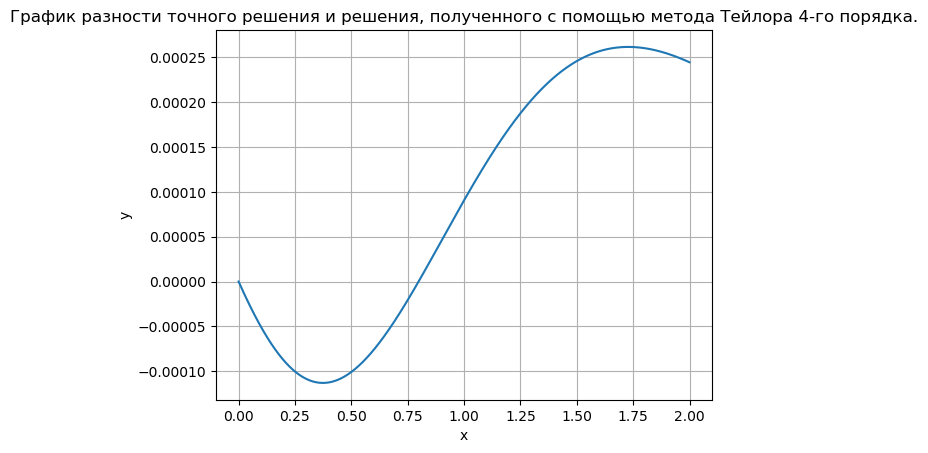

PyObject Text(132.16,0.5,'y')

In [9]:
using PyPlot
#plot(mass_x,mass_y3)
plot(mass_x,mass_y2-mass_y1)
#plot(mass_x,mass_y1)
grid("on")
title("График разности точного решения и решения, полученного с помощью метода Тейлора 4-го порядка.")
xlabel("x")
ylabel("y")

## Вывод:
<big> 
    Методом Тейлора 4-го порядка было получено решение за $7$ итераций с шагом $0.000390625$.  Оно совпало с теоретическим.
</big>